# VISUALISING THE PLAN-OF-ATTACK OF ALL CLASSIFICTION MODELS ON       SOCIAL NETWORKS DATASET

### IMPORTING THE LIBRARIES

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
dataset=pd.read_csv('Social_Network_ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


    This notebook is for visualising all the classification algorithms side-by-side to understand their plan of action in classification
    '
    '
    I have searched for many datasets but to visualize the classification models with multiple variable is not possible hence i have chosen this dataset wher AGE and SALARY are two atributes
    '
    '
    This datasets describes whether a individual who has seen an advertisement ,have bought the product or not(0/1)

In [47]:
dataset.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
181,15774727,Female,31,71000,0
145,15746422,Female,24,89000,0
42,15772798,Male,35,108000,0
158,15762605,Male,26,30000,0
389,15668521,Female,48,35000,1
274,15692819,Female,57,26000,1
228,15691808,Female,40,72000,0
392,15748589,Female,45,45000,1
59,15789109,Female,32,117000,0
84,15798659,Female,30,62000,0


### SPLITTING THE DEPENDENT AND INDEPENDENT VARIABLES

In [18]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

### SPLITTING THE DATASET INTO TRAINING AND TESTING

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

### FEATURE SCALING

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\sai prakesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sai prakesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sai prakesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [49]:
#PREPROCESSING STEP IS FINISHED

## MODEL-1 LOGISTIC REGRESSION CLASSIFICATION

C:\Users\sai prakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


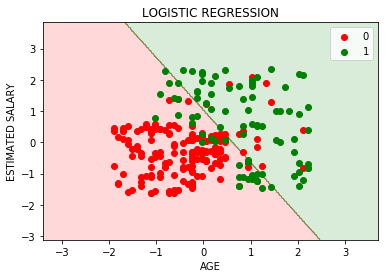

In [38]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(random_state = 0)
cls.fit(X_train, y_train)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1.5, stop = X_set[:, 0].max() + 1.5, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1.5, stop = X_set[:, 1].max() + 1.5, step = 0.02))
plt.contourf(X1, X2, cls.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('RED', 'GREEN')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('RED', 'GREEN'))(i), label = j)
plt.title("LOGISTIC REGRESSION")
plt.xlabel("AGE")
plt.ylabel("ESTIMATED SALARY")
plt.legend()
plt.show()
    

## MODEL-2 KNN CLASSIFICATION

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


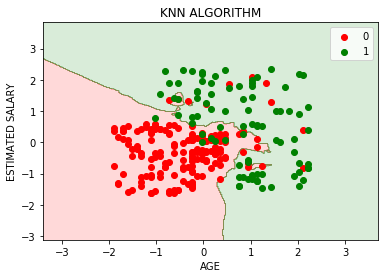

In [40]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
cls2 = KNeighborsClassifier(n_neighbors = 5)
cls2.fit(X_train, y_train)

#plot
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1.5, stop = X_set[:, 0].max() + 1.5, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1.5, stop = X_set[:, 1].max() + 1.5, step = 0.02))
plt.contourf(X1, X2, cls2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('RED', 'GREEN')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('RED', 'GREEN'))(i), label = j)
plt.title("KNN ALGORITHM")
plt.xlabel("AGE")
plt.ylabel("ESTIMATED SALARY")
plt.legend()
plt.show()   


## MODEL-3 SVM CLASSIFICATION

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


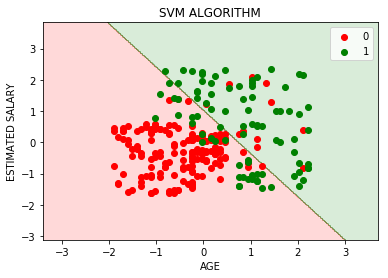

In [41]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
cls3 = SVC(kernel = 'linear', random_state = 0)
cls3.fit(X_train, y_train)
#plot
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1.5, stop = X_set[:, 0].max() + 1.5, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1.5, stop = X_set[:, 1].max() + 1.5, step = 0.02))
plt.contourf(X1, X2, cls3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('RED', 'GREEN')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('RED', 'GREEN'))(i), label = j)
plt.title("SVM ALGORITHM")
plt.xlabel("AGE")
plt.ylabel("ESTIMATED SALARY")
plt.legend()
plt.show()


## MODEL-4 NAIVE-BAYES CLASSIFICATION

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


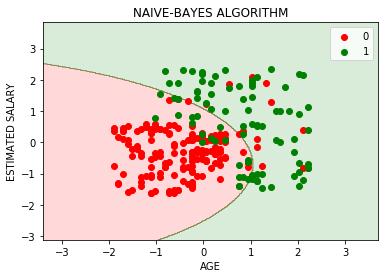

In [43]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
cls4 = GaussianNB()
cls4.fit(X_train, y_train)
#plot
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1.5, stop = X_set[:, 0].max() + 1.5, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1.5, stop = X_set[:, 1].max() + 1.5, step = 0.02))
plt.contourf(X1, X2, cls4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('RED', 'GREEN')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('RED', 'GREEN'))(i), label = j)
plt.title("NAIVE-BAYES ALGORITHM")
plt.xlabel("AGE")
plt.ylabel("ESTIMATED SALARY")
plt.legend()
plt.show()

## MODEL-5 DECISION TREE CLASSIFICATION

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


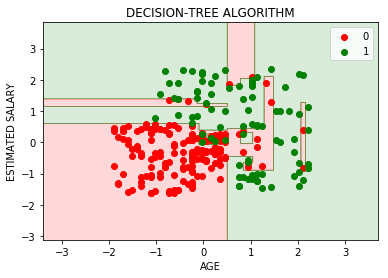

In [44]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
cls5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
cls5.fit(X_train, y_train)
#plot
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1.5, stop = X_set[:, 0].max() + 1.5, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1.5, stop = X_set[:, 1].max() + 1.5, step = 0.02))
plt.contourf(X1, X2, cls5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('RED', 'GREEN')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('RED', 'GREEN'))(i), label = j)
plt.title("DECISION-TREE ALGORITHM")
plt.xlabel("AGE")
plt.ylabel("ESTIMATED SALARY")
plt.legend()
plt.show()

## MODEL-6 RANDOM FOREST CLASSIFICATION

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


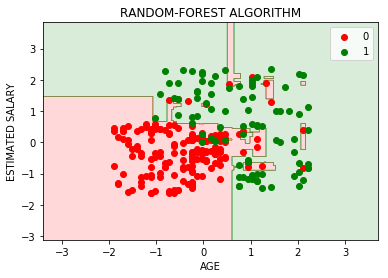

In [46]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
cls6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
cls6.fit(X_train, y_train)
#plot
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1.5, stop = X_set[:, 0].max() + 1.5, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1.5, stop = X_set[:, 1].max() + 1.5, step = 0.02))
plt.contourf(X1, X2, cls6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('RED', 'GREEN')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('RED', 'GREEN'))(i), label = j)
plt.title("RANDOM-FOREST ALGORITHM")
plt.xlabel("AGE")
plt.ylabel("ESTIMATED SALARY")
plt.legend()
plt.show()